# **Image Retrieval**

In [4]:
!pip install transformers
!pip install gradio
!pip install timm
!pip install torchvision
!pip install torch

In [2]:
from transformers.utils import logging
logging.set_verbosity_error()

In [7]:
from transformers import pipeline, AutoProcessor
from transformers import BlipForImageTextRetrieval

In [9]:
mod = BlipForImageTextRetrieval.from_pretrained("Salesforce/blip-itm-base-coco")

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/895M [00:00<?, ?B/s]

In [10]:
processor = AutoProcessor.from_pretrained(
    "Salesforce/blip-itm-base-coco")

In [11]:
url =  'https://cdn-lfs.hf.co/repos/96/a2/96a2c8468c1546e660ac2609e49404b8588fcf5a748761fa72c154b2836b4c83/42378b786aa85e6103abbd2ee24e56672467d562ecf884eb51cefe3a68971087?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27hf-logo-with-title.png%3B+filename%3D%22hf-logo-with-title.png%22%3B&response-content-type=image%2Fpng&Expires=1732625031&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTczMjYyNTAzMX19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5oZi5jby9yZXBvcy85Ni9hMi85NmEyYzg0NjhjMTU0NmU2NjBhYzI2MDllNDk0MDRiODU4OGZjZjVhNzQ4NzYxZmE3MmMxNTRiMjgzNmI0YzgzLzQyMzc4Yjc4NmFhODVlNjEwM2FiYmQyZWUyNGU1NjY3MjQ2N2Q1NjJlY2Y4ODRlYjUxY2VmZTNhNjg5NzEwODc%7EcmVzcG9uc2UtY29udGVudC1kaXNwb3NpdGlvbj0qJnJlc3BvbnNlLWNvbnRlbnQtdHlwZT0qIn1dfQ__&Signature=pR0awpnJa6CxdKJwbTFOaeMYbpGgZ503i2KbgqrEl915Ricl1PkUrAeIh6DDzNJy2qIVhmQFA%7Ecstc48kf2NwuTZOK7SWO5k3LpOCNUB6g1QQZJhysdjZlxYxA%7E6C15r2IhmSc3W4fQWZouOTBh6Dlo%7EQpcfv5%7E%7EnsN%7ERS5TpXUfnlRZn9l3FL0efoySMQPc8xMoSMb9WRqy7uZTLEXd38Vdp66S3Sw53hGAuZ9tOpsHvKz9atjNc5-jVa8UrdAXHbXyK9bgxXWMtbVILASbtSZsF-XyOp%7Ei-H5S8HioB-3kOcpGbkYE2l2auuqL8sspA4Av%7EF%7EY3Kla9FFodSl8tA__&Key-Pair-Id=K3RPWS32NSSJCE'

In [14]:
from PIL import Image
import requests

In [16]:
raw_image =  Image.open(
    requests.get(url, stream=True).raw).convert('RGB')

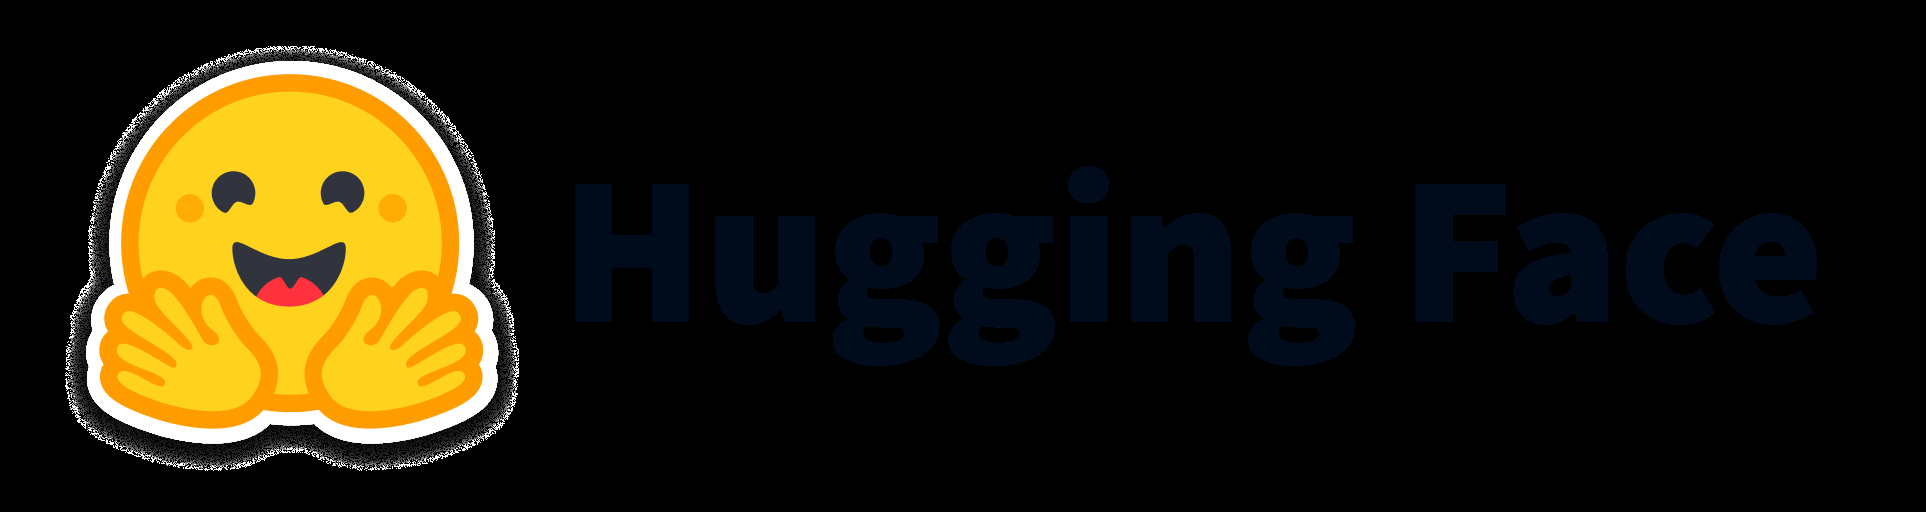

In [17]:
raw_image

In [28]:
text = 'a dog'

In [29]:
input = processor(raw_image, text, return_tensors="pt")

In [20]:
input

{'pixel_values': tensor([[[[-1.7923, -1.7923, -1.7923,  ..., -1.7923, -1.7923, -1.7923],
          [-1.7923, -1.7923, -1.7923,  ..., -1.7923, -1.7923, -1.7923],
          [-1.7923, -1.7923, -1.7923,  ..., -1.7923, -1.7923, -1.7923],
          ...,
          [-1.7923, -1.7923, -1.7923,  ..., -1.7923, -1.7923, -1.7923],
          [-1.7923, -1.7923, -1.7923,  ..., -1.7923, -1.7923, -1.7923],
          [-1.7923, -1.7923, -1.7923,  ..., -1.7923, -1.7923, -1.7923]],

         [[-1.7521, -1.7521, -1.7521,  ..., -1.7521, -1.7521, -1.7521],
          [-1.7521, -1.7521, -1.7521,  ..., -1.7521, -1.7521, -1.7521],
          [-1.7521, -1.7521, -1.7521,  ..., -1.7521, -1.7521, -1.7521],
          ...,
          [-1.7521, -1.7521, -1.7521,  ..., -1.7521, -1.7521, -1.7521],
          [-1.7521, -1.7521, -1.7521,  ..., -1.7521, -1.7521, -1.7521],
          [-1.7521, -1.7521, -1.7521,  ..., -1.7521, -1.7521, -1.7521]],

         [[-1.4802, -1.4802, -1.4802,  ..., -1.4802, -1.4802, -1.4802],
          [-1

In [30]:
itm_scores = mod(**input)[0]

In [22]:
itm_scores

tensor([[-4.4488,  4.4462]], grad_fn=<AddmmBackward0>)

In [23]:
import torch

In [31]:
scores = torch.nn.functional.softmax(itm_scores, dim=1)

In [25]:
scores

tensor([[1.3706e-04, 9.9986e-01]], grad_fn=<SoftmaxBackward0>)

In [32]:
print(f"""\
The image and text are matched \
with a probability of {scores[0][1]:.4f}""")

The image and text are matched with a probability of 0.0002
